In [25]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [26]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [27]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [28]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [29]:



df = getQuotes(frameM30, 2023, 10)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1696204800,1.05683,1.05693,1.05675,1.05675,147,39,0
1,1696206600,1.05675,1.05675,1.05630,1.05659,297,39,0
2,1696208400,1.05661,1.05691,1.05607,1.05633,7590,9,0
3,1696210200,1.05634,1.05638,1.05574,1.05588,1008,9,0
4,1696212000,1.05589,1.05612,1.05574,1.05607,781,9,0
...,...,...,...,...,...,...,...,...
475,1697232600,1.05078,1.05119,1.05047,1.05107,2348,9,0
476,1697234400,1.05107,1.05137,1.05089,1.05108,2079,9,0
477,1697236200,1.05108,1.05154,1.05103,1.05134,1835,9,0
478,1697238000,1.05134,1.05135,1.05074,1.05081,782,9,0


In [30]:


def heikenAshi(df):
    df['HA_CLOSE'] = (df['open'] + df['high'] + df['low'] + df['close']) / 4
    df['HA_OPEN'] = (df['open'].shift(1) + df['close'].shift(1)) / 2
    df['HA_HIGH'] = df[['HA_OPEN', 'high', 'HA_CLOSE']].max(axis=1)
    df['HA_LOW'] = df[['HA_OPEN', 'low', 'HA_CLOSE']].min(axis=1)
    return df



In [31]:


df = heikenAshi(df)

df


,time,open,high,low,close,tick_volume,spread,real_volume,HA_CLOSE,HA_OPEN,HA_HIGH,HA_LOW
0,1696204800,1.05683,1.05693,1.05675,1.05675,147,39,0,1.056815,NaN,1.056930,1.05675
1,1696206600,1.05675,1.05675,1.05630,1.05659,297,39,0,1.056598,1.056790,1.056790,1.05630
2,1696208400,1.05661,1.05691,1.05607,1.05633,7590,9,0,1.056480,1.056670,1.056910,1.05607
3,1696210200,1.05634,1.05638,1.05574,1.05588,1008,9,0,1.056085,1.056470,1.056470,1.05574
4,1696212000,1.05589,1.05612,1.05574,1.05607,781,9,0,1.055955,1.056110,1.056120,1.05574
...,...,...,...,...,...,...,...,...,...,...,...,...
475,1697232600,1.05078,1.05119,1.05047,1.05107,2348,9,0,1.050878,1.050620,1.051190,1.05047
476,1697234400,1.05107,1.05137,1.05089,1.05108,2079,9,0,1.051102,1.050925,1.051370,1.05089
477,1697236200,1.05108,1.05154,1.05103,1.05134,1835,9,0,1.051247,1.051075,1.051540,1.05103
478,1697238000,1.05134,1.05135,1.05074,1.05081,782,9,0,1.051060,1.051210,1.051350,1.05074


In [32]:




def ohlcPlot(df):
    plt.figure(figsize=(14, 6))
    for i in range(len(df)):
        plt.vlines(x=i, ymin=df.iloc[i]['HA_LOW'], ymax=df.iloc[i]['HA_HIGH'], color='black', linewidth=1)
        if df.iloc[i]['HA_CLOSE'] > df.iloc[i]['HA_OPEN']:
            plt.vlines(x=i, ymin=df.iloc[i]['HA_OPEN'], ymax=df.iloc[i]['HA_CLOSE'], color='green', linewidth=3)
        if df.iloc[i]['HA_CLOSE'] < df.iloc[i]['HA_OPEN']:
            plt.vlines(x=i, ymin=df.iloc[i]['HA_CLOSE'], ymax=df.iloc[i]['HA_OPEN'], color='red', linewidth=3)
        if df.iloc[i]['HA_CLOSE'] == df.iloc[i]['HA_OPEN']:
            plt.vlines(x=i, ymin=df.iloc[i]['HA_CLOSE'], ymax=df.iloc[i]['HA_OPEN'], color='black', linewidth=6)
    plt.grid()
    plt.show()




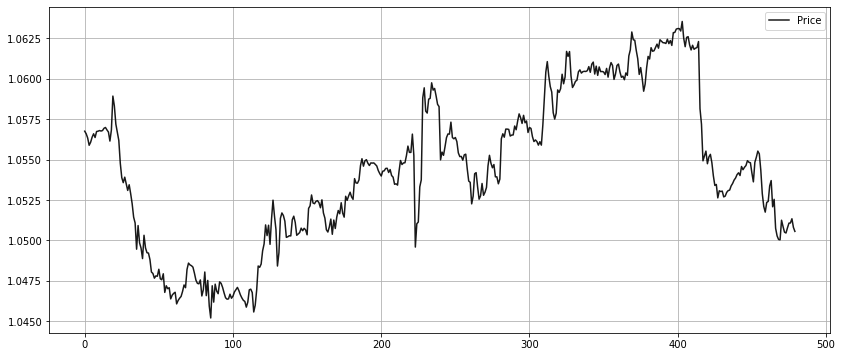

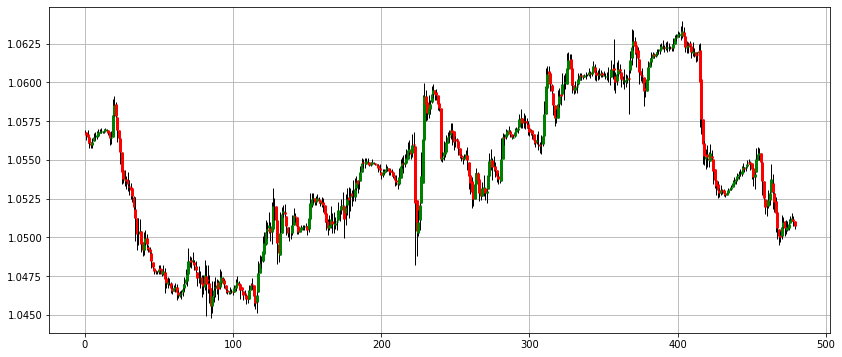

In [33]:


plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.legend()
plt.grid(True)
plt.show()

ohlcPlot(df)

